In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pl
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



In [2]:
data = pd.read_csv("GermanCSV.csv")
data.head()


,Existing Checking Account Status,Duration (Months),Credit History,Purpose Of Credit,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job Type,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Good vs Bad Credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
data.tail()

,Existing Checking Account Status,Duration (Months),Credit History,Purpose Of Credit,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job Type,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Good vs Bad Credit
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [4]:
data.columns

Index(['Existing Checking Account Status', 'Duration (Months)',
       'Credit History', 'Purpose Of Credit', 'Credit Amount',
       'Savings Account/Bonds', 'Present Employment Since',
       'Installment rate in percentage of disposable income ',
       'Personal status and sex ', 'Other debtors / guarantors ',
       'Present residence since ', 'Property ', 'Age in years',
       'Other installment plans ', 'Housing ',
       'Number of existing credits at this bank ', 'Job Type',
       'Number of people being liable to provide maintenance for ',
       'Telephone ', 'Foreign Worker', 'Good vs Bad Credit'],
      dtype='object')

In [5]:
len(data.columns)

21

In [6]:
data.shape

(1000, 21)

In [7]:
data.describe()

,Duration (Months),Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Good vs Bad Credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [8]:
#investigating diversity of datatypes of categorical and numerical data
for i in data.columns:
    print('%s data type is: \n  %s'%(i,str(data[i].dtypes)))

Existing Checking Account Status data type is: 
  object
Duration (Months) data type is: 
  int64
Credit History data type is: 
  object
Purpose Of Credit data type is: 
  object
Credit Amount data type is: 
  int64
Savings Account/Bonds data type is: 
  object
Present Employment Since data type is: 
  object
Installment rate in percentage of disposable income  data type is: 
  int64
Personal status and sex  data type is: 
  object
Other debtors / guarantors  data type is: 
  object
Present residence since  data type is: 
  int64
Property  data type is: 
  object
Age in years data type is: 
  int64
Other installment plans  data type is: 
  object
Housing  data type is: 
  object
Number of existing credits at this bank  data type is: 
  int64
Job Type data type is: 
  object
Number of people being liable to provide maintenance for  data type is: 
  int64
Telephone  data type is: 
  object
Foreign Worker data type is: 
  object
Good vs Bad Credit data type is: 
  int64


In [9]:
#How Many Unique Outcomes
data['Good vs Bad Credit'].unique()
print('The Unique Elements are:',data['Good vs Bad Credit'].unique())
#Total Per Unique Outcome
data['Good vs Bad Credit'].value_counts()
#1 is good and 2 is bad

The Unique Elements are: [1 2]


1    700
2    300
Name: Good vs Bad Credit, dtype: int64

In [10]:
#Changing it to conventional classification, 0 is good and 1 is bad
data['Good vs Bad Credit'] = data['Good vs Bad Credit'] - 1


In [11]:
data.head()

,Existing Checking Account Status,Duration (Months),Credit History,Purpose Of Credit,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job Type,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Good vs Bad Credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


<Figure size 864x864 with 0 Axes>

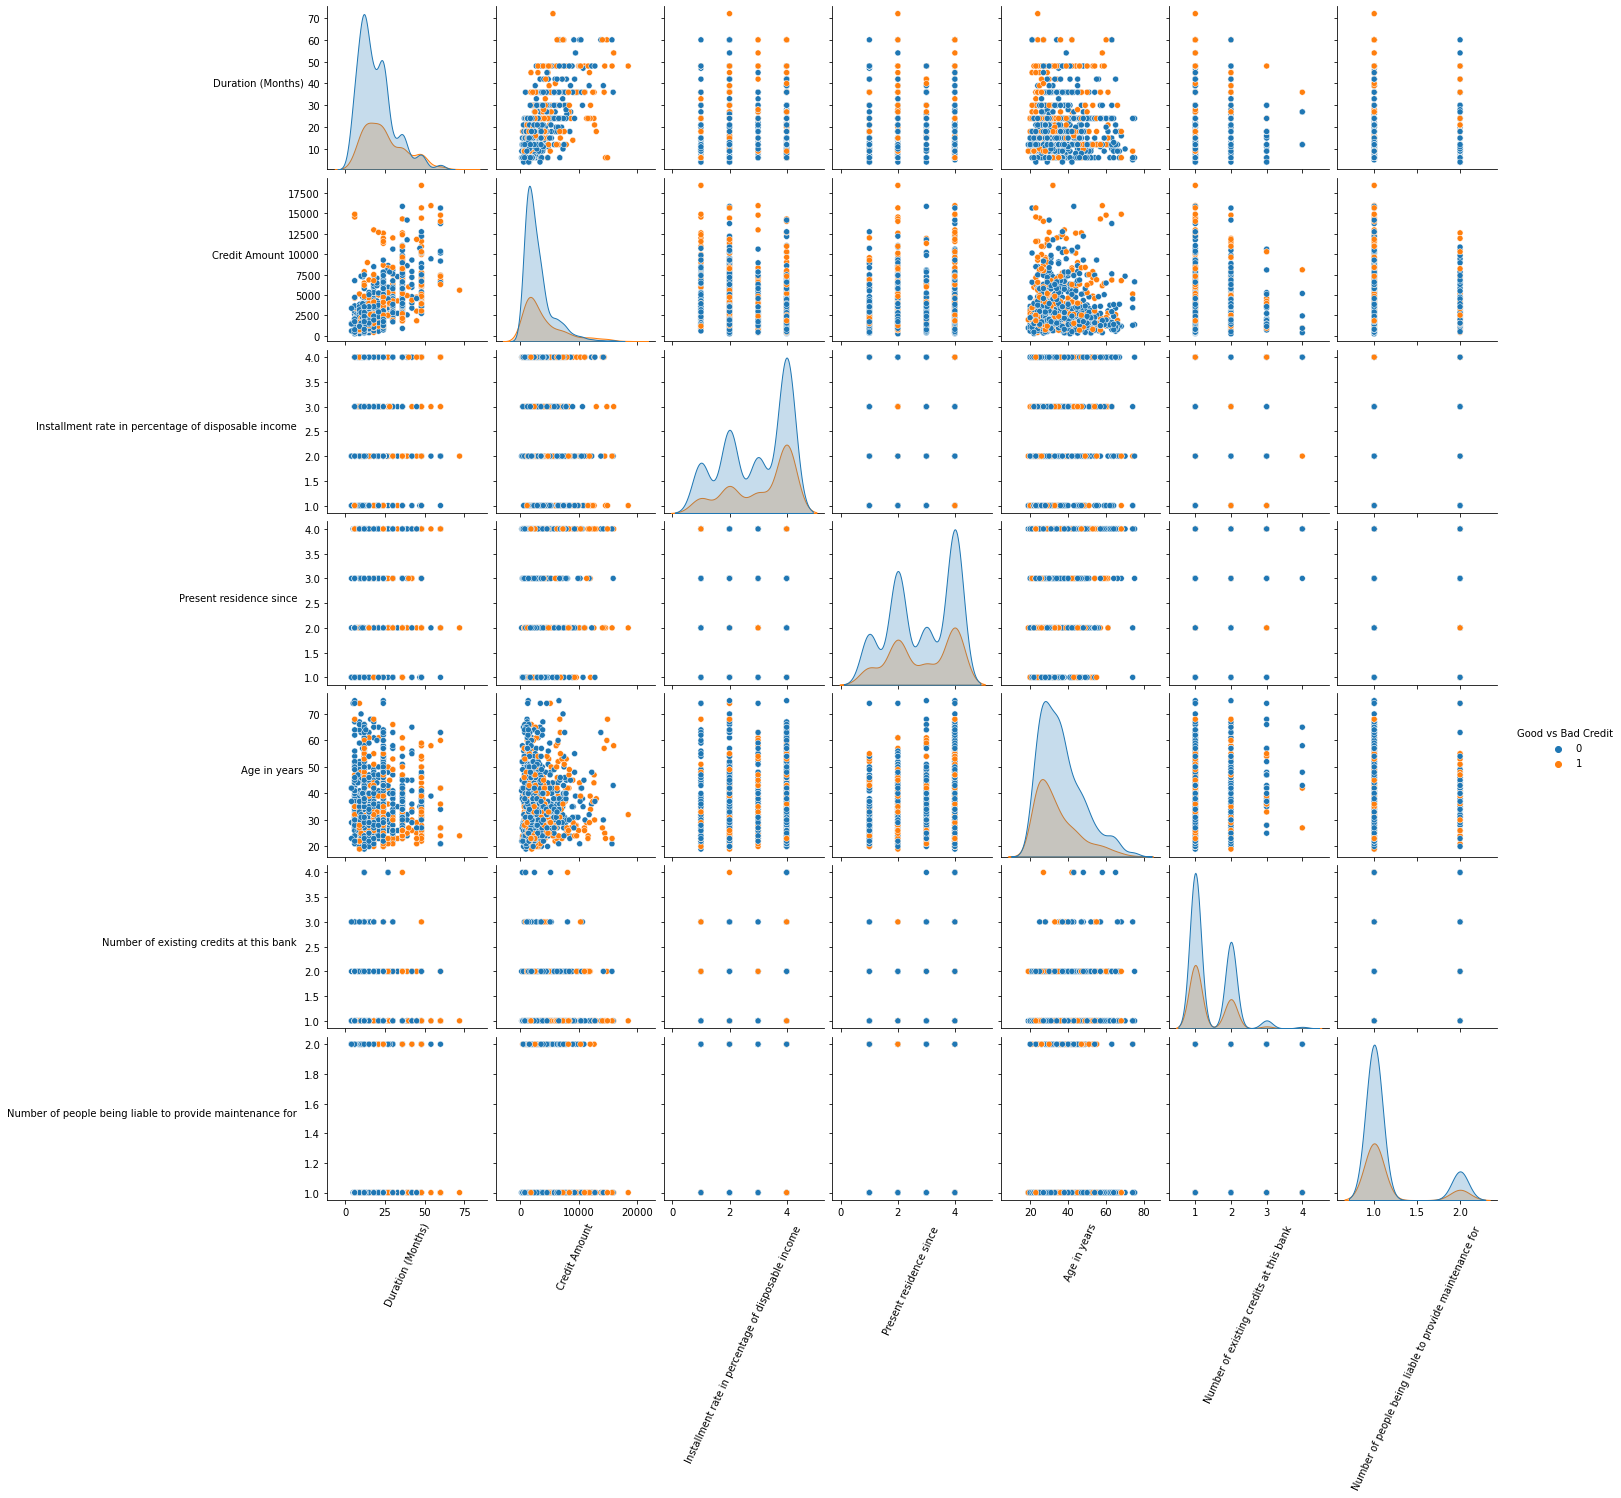

In [12]:
#Distribution of Credit Status within Each Indicator

#PairPlots
plt.figure(figsize=(12,12))
g = sns.pairplot(data=data,hue='Good vs Bad Credit',diag_kind='kde')
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 65)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')


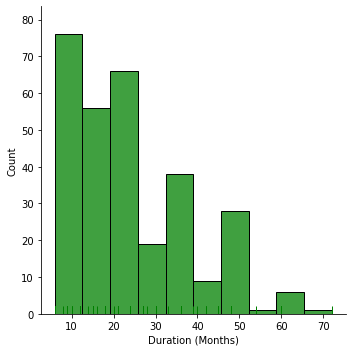

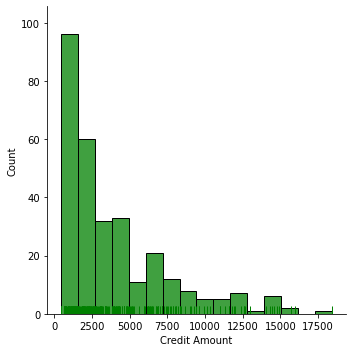

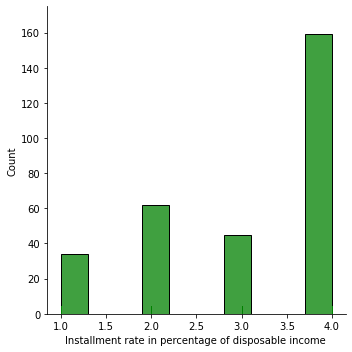

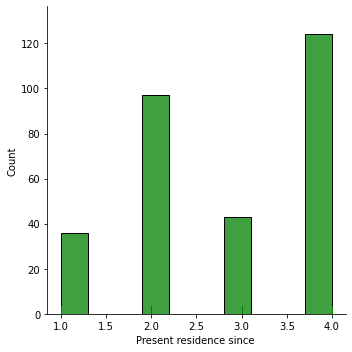

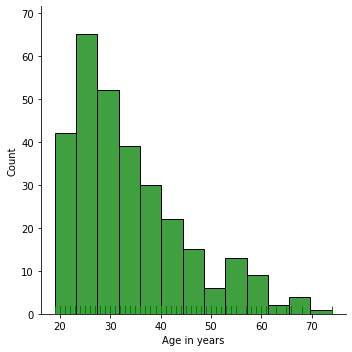

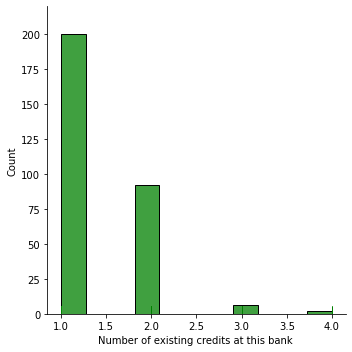

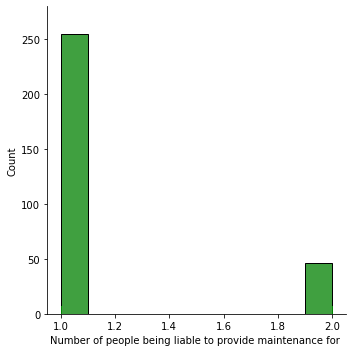

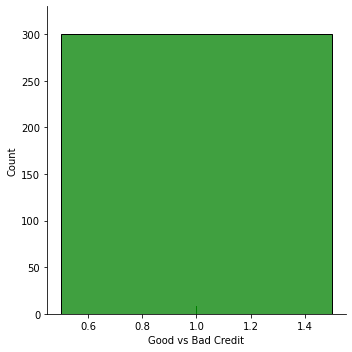

In [13]:

#Basic Dist Plots
badcredit = data[data['Good vs Bad Credit']==1]




from scipy import stats

for col in badcredit.columns:
    if badcredit[col].dtype == np.int64:
        sns.displot(badcredit[col],rug=True, color='g' )


In [14]:
# Investigate correlations
corr_matrix = data.corr()
corr_matrix
corr_matrix["Good vs Bad Credit"].sort_values(ascending=False)


Good vs Bad Credit                                           1.000000
Duration (Months)                                            0.214927
Credit Amount                                                0.154739
Installment rate in percentage of disposable income          0.072404
Present residence since                                      0.002967
Number of people being liable to provide maintenance for    -0.003015
Number of existing credits at this bank                     -0.045732
Age in years                                                -0.091127
Name: Good vs Bad Credit, dtype: float64

In [15]:


# # Divide data into training and testing subsets
# X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
#                                                                 random_state=42)

# # "Cardinality" means the number of unique values in a column
# # Select categorical columns with relatively low cardinality (convenient but arbitrary)
# low_cardinality_cols = [cat for cat in X_train_full.columns if X_train_full[cat].nunique() < 10 and 
#                         X_train_full[cat].dtype == "object"]

# # Select numerical columns
# numerical_cols = [numc for numc in X_train_full.columns if X_train_full[numc].dtype in ['int64', 'float64']]

# # Keep selected columns only
# my_cols = low_cardinality_cols + numerical_cols
# X_train = X_train_full[my_cols].copy()
# X_test = X_test_full[my_cols].copy()

In [16]:
# # Get list of categorical variables
# s = (X_train.dtypes == 'object')
# object_cols = list(s[s].index)

In [17]:
# # Apply one-hot encoder to each column with categorical data
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
# OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# # One-hot encoding removed index; put it back
# OH_cols_train.index = X_train.index
# OH_cols_test.index = X_test.index

# # Remove categorical columns (will replace with one-hot encoding)
# num_X_train = X_train.drop(object_cols, axis=1)
# num_X_test = X_test.drop(object_cols, axis=1)

# # Add one-hot encoded columns to numerical features
# OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
# OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)


In [18]:

#
# Preparing the data
#

# drop labels from the data and create a separate data frame with the target variable
data_labels = data["Good vs Bad Credit"].copy()
features = data.drop("Good vs Bad Credit", axis=1) 


features.head(4)
features.describe()


,Duration (Months),Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [19]:
# check for nulls
features.isnull().any()

Existing Checking Account Status                             False
Duration (Months)                                            False
Credit History                                               False
Purpose Of Credit                                            False
Credit Amount                                                False
Savings Account/Bonds                                        False
Present Employment Since                                     False
Installment rate in percentage of disposable income          False
Personal status and sex                                      False
Other debtors / guarantors                                   False
Present residence since                                      False
Property                                                     False
Age in years                                                 False
Other installment plans                                      False
Housing                                                      F

In [20]:
# check for nulls
features.isna().any()

Existing Checking Account Status                             False
Duration (Months)                                            False
Credit History                                               False
Purpose Of Credit                                            False
Credit Amount                                                False
Savings Account/Bonds                                        False
Present Employment Since                                     False
Installment rate in percentage of disposable income          False
Personal status and sex                                      False
Other debtors / guarantors                                   False
Present residence since                                      False
Property                                                     False
Age in years                                                 False
Other installment plans                                      False
Housing                                                      F

In [21]:
set(list(features.columns))

{'Age in years',
 'Credit Amount',
 'Credit History',
 'Duration (Months)',
 'Existing Checking Account Status',
 'Foreign Worker',
 'Housing ',
 'Installment rate in percentage of disposable income ',
 'Job Type',
 'Number of existing credits at this bank ',
 'Number of people being liable to provide maintenance for ',
 'Other debtors / guarantors ',
 'Other installment plans\xa0',
 'Personal status and sex ',
 'Present Employment Since',
 'Present residence since ',
 'Property ',
 'Purpose Of Credit',
 'Savings Account/Bonds',
 'Telephone '}

In [22]:

#
# Categorical data - transforming and one-hot encoding
#

# Isolate categorical attributes
enc1 = features['Existing Checking Account Status']
enc3 = features['Credit History']
enc4 = features['Purpose Of Credit']
enc6 = features['Savings Account/Bonds']
enc7 = features['Present Employment Since']
enc9 = features['Personal status and sex ']
enc10 = features['Other debtors / guarantors ']
enc12 = features['Property ']
enc14 = features['Other installment plans\xa0']
enc15 = features['Housing ']
enc17 = features['Job Type']
enc19 = features['Telephone ']
enc20 = features['Foreign Worker']

# factorise to turn into integers (note different aproach from the book)
enc1_encoded, enc1_categories = enc1.factorize()
enc1_encoded
len(enc1_encoded)
enc1_categories

enc3_encoded, enc3_categories = enc3.factorize()
enc3_encoded
len(enc3_encoded)
enc3_categories

enc4_encoded, enc4_categories = enc4.factorize()
enc4_encoded
len(enc4_encoded)
enc4_categories

enc6_encoded, enc6_categories = enc6.factorize()
enc6_encoded
len(enc6_encoded)
enc6_categories

enc7_encoded, enc7_categories = enc7.factorize()
enc7_encoded
len(enc7_encoded)
enc7_categories

enc9_encoded, enc9_categories = enc9.factorize()
enc9_encoded
len(enc9_encoded)
enc9_categories

enc10_encoded, enc10_categories = enc10.factorize()
enc10_encoded
len(enc10_encoded)
enc10_categories

enc12_encoded, enc12_categories = enc12.factorize()
enc12_encoded
len(enc12_encoded)
enc12_categories

enc14_encoded, enc14_categories = enc14.factorize()
enc14_encoded
len(enc14_encoded)
enc14_categories

enc15_encoded, enc15_categories = enc15.factorize()
enc15_encoded
len(enc15_encoded)
enc15_categories

enc17_encoded, enc17_categories = enc17.factorize()
enc17_encoded
len(enc17_encoded)
enc17_categories

enc19_encoded, enc19_categories = enc19.factorize()
enc19_encoded
len(enc19_encoded)
enc19_categories

enc20_encoded, enc20_categories = enc20.factorize()
enc20_encoded
len(enc20_encoded)
enc20_categories



Index(['A201', 'A202'], dtype='object')

In [23]:

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Need to reshape into 2-d array
enc1_1hot = encoder.fit_transform(enc1_encoded.reshape(-1,1))
enc1_1hot

enc3_1hot = encoder.fit_transform(enc3_encoded.reshape(-1,1))
enc3_1hot

enc4_1hot = encoder.fit_transform(enc4_encoded.reshape(-1,1))
enc4_1hot

enc6_1hot = encoder.fit_transform(enc6_encoded.reshape(-1,1))
enc6_1hot

enc7_1hot = encoder.fit_transform(enc7_encoded.reshape(-1,1))
enc7_1hot

enc9_1hot = encoder.fit_transform(enc9_encoded.reshape(-1,1))
enc9_1hot

enc10_1hot = encoder.fit_transform(enc10_encoded.reshape(-1,1))
enc10_1hot

enc12_1hot = encoder.fit_transform(enc12_encoded.reshape(-1,1))
enc12_1hot

enc14_1hot = encoder.fit_transform(enc14_encoded.reshape(-1,1))
enc14_1hot

enc15_1hot = encoder.fit_transform(enc15_encoded.reshape(-1,1))
enc15_1hot

enc17_1hot = encoder.fit_transform(enc17_encoded.reshape(-1,1))
enc17_1hot

enc19_1hot = encoder.fit_transform(enc19_encoded.reshape(-1,1))
enc19_1hot

enc20_1hot = encoder.fit_transform(enc20_encoded.reshape(-1,1))
enc20_1hot


<1000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [24]:

# Sparse matrix - can convert to dense array
e1 = enc1_1hot.toarray()
e3 = enc3_1hot.toarray()
e4 = enc4_1hot.toarray()
e6 = enc6_1hot.toarray()
e7 = enc7_1hot.toarray()
e9 = enc9_1hot.toarray()
e10 = enc10_1hot.toarray()
e12 = enc12_1hot.toarray()
e14 = enc14_1hot.toarray()
e15 = enc15_1hot.toarray()
e17 = enc17_1hot.toarray()
e19 = enc19_1hot.toarray()
e20 = enc20_1hot.toarray()

In [25]:
# Can take a look at this
e1[:10]
e6[:10]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [26]:
# Transforming numeric data
# Need to isolate numeric attributes
features_num_list = []
for col in features.columns:
    if features[col].dtype == np.int64:
        features_num_list.append(features[col])
features_num = pd.DataFrame(features_num_list).T

features_num_names = list(features_num.columns)

In [27]:
features_num[features_num_names]

,Duration (Months),Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [28]:
# Perform scaling using StandardScaler
std_scaler = preprocessing.StandardScaler()
features_num[features_num_names]=  std_scaler.fit_transform(features_num[features_num_names])

# Take a look at this...
features_num.head(10)

,Duration (Months),Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869
5,1.252574,2.050009,-0.870183,1.046987,-0.048022,-0.704926,2.334869
6,0.256953,-0.154629,0.024147,1.046987,1.535122,-0.704926,-0.428290
7,1.252574,1.303197,-0.870183,-0.765977,-0.048022,-0.704926,-0.428290
8,-0.738668,-0.075233,-0.870183,1.046987,2.238742,-0.704926,-0.428290
9,0.754763,0.695681,0.918477,-0.765977,-0.663689,1.027079,-0.428290


In [29]:


# 
# Now add the encoded categorical data to the transformed numeric data
#
ed1 = pd.DataFrame(e1)
ed1.columns = enc1_categories
ed1.index = features.index

ed3 = pd.DataFrame(e3)
ed3.columns = enc3_categories
ed3.index = features.index

ed4 = pd.DataFrame(e4)
ed4.columns = enc4_categories
ed4.index = features.index

ed6 = pd.DataFrame(e6)
ed6.columns = enc6_categories
ed6.index = features.index

ed7 = pd.DataFrame(e7)
ed7.columns = enc7_categories
ed7.index = features.index

ed9 = pd.DataFrame(e9)
ed9.columns = enc9_categories
ed9.index = features.index

ed10 = pd.DataFrame(e10)
ed10.columns = enc10_categories
ed10.index = features.index

ed12 = pd.DataFrame(e12)
ed12.columns = enc12_categories
ed12.index = features.index

ed14 = pd.DataFrame(e14)
ed14.columns = enc14_categories
ed14.index = features.index

ed15 = pd.DataFrame(e15)
ed15.columns = enc15_categories
ed15.index = features.index

ed17 = pd.DataFrame(e17)
ed17.columns = enc17_categories
ed17.index = features.index

ed19 = pd.DataFrame(e19)
ed19.columns = enc19_categories
ed19.index = features.index

ed20 = pd.DataFrame(e20)
ed20.columns = enc20_categories
ed20.index = features.index

In [30]:
ed3

,A34,A32,A33,A30,A31
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,0.0
998,0.0,1.0,0.0,0.0,0.0


In [31]:

data_prepared = features_num.join(ed1)

d3 = ed3.join(data_prepared)

d4 = ed4.join(d3)

d6 = ed6.join(d4)

d7 = ed7.join(d6)

d9 = ed9.join(d7)

d10 = ed10.join(d9)

d12 = ed12.join(d10)

d14 = ed14.join(d12)

d15 = ed15.join(d14)

d17 = ed17.join(d15)

d19 = ed19.join(d17)

d20 = ed20.join(d19)

data_complete = d20
data_complete.head(5)
data_complete.columns

loans = data_complete

In [37]:
loans

,A201,A202,A192,A191,A173,A172,A174,A171,A152,A153,...,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,A11,A12,A14,A13,Good vs Bad Credit
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.918477,1.046987,2.766456,1.027079,-0.428290,1.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.0,1.0,0.0,0.0,1
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.024147,1.046987,1.535122,1.027079,2.334869,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0.0,0.0,1.0,0.0,0
996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.918477,1.046987,0.391740,-0.704926,-0.428290,1.0,0.0,0.0,0.0,0
997,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.918477,1.046987,0.215835,-0.704926,-0.428290,0.0,0.0,1.0,0.0,0
998,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1.0,0.0,0.0,0.0,1


In [38]:
data_labels

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Good vs Bad Credit, Length: 1000, dtype: int64

In [39]:
####Add 'Good vs Bad Credit' Binary Outcome Back into 
data_labels
loans['Good vs Bad Credit'] = data_labels
loans

,A201,A202,A192,A191,A173,A172,A174,A171,A152,A153,...,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,A11,A12,A14,A13,Good vs Bad Credit
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.918477,1.046987,2.766456,1.027079,-0.428290,1.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.0,1.0,0.0,0.0,1
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.024147,1.046987,1.535122,1.027079,2.334869,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0.0,0.0,1.0,0.0,0
996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.918477,1.046987,0.391740,-0.704926,-0.428290,1.0,0.0,0.0,0.0,0
997,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.918477,1.046987,0.215835,-0.704926,-0.428290,0.0,0.0,1.0,0.0,0
998,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1.0,0.0,0.0,0.0,1


In [40]:
y = loans["Good vs Bad Credit"].copy()
X = loans.drop("Good vs Bad Credit", axis=1) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42, stratify=loans['Good vs Bad Credit'])

In [341]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [342]:
predictions = model_lr.predict(X_test)

In [343]:

from sklearn.metrics import classification_report

In [344]:

from sklearn.metrics import accuracy_score
print('Model Accuracy on Test Data: ',accuracy_score(y_test, predictions))

Model Accuracy on Test Data:  0.78


In [345]:
#Use Feature Importance to Select Only the most Important Features
#Random Forrest highlights the most important features
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
f_import = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
f_import_df = pd.DataFrame(pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False))
important_features_list = list(f_import_df.head(15).index)

In [346]:
important_features_list

['Credit Amount',
 'Age in years',
 'Duration (Months)',
 'A14',
 'Installment rate in percentage of disposable income ',
 'Present residence since ',
 'A11',
 'A61',
 'A34',
 'A12',
 'A72',
 'A93',
 'A121',
 'Number of existing credits at this bank ',
 'A92']

In [347]:
X_train_fi = X_train[important_features_list]
X_test_fi = X_test[important_features_list]

In [348]:
X_train_fi

,Credit Amount,Age in years,Duration (Months),A14,Installment rate in percentage of disposable income,Present residence since,A11,A61,A34,A12,A72,A93,A121,Number of existing credits at this bank,A92
828,1.794810,1.007407,1.252574,0.0,0.024147,1.046987,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.704926,0.0
997,-0.874503,0.215835,-0.738668,1.0,0.918477,1.046987,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.704926,0.0
148,0.744240,-0.663689,1.252574,0.0,0.024147,-0.765977,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.027079,0.0
735,0.254753,-0.575737,1.252574,0.0,0.024147,-0.765977,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.704926,1.0
130,1.848685,-1.015499,2.248194,0.0,-1.764514,-0.765977,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.704926,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,-0.721029,-0.751642,-1.236478,1.0,-1.764514,-1.672459,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.027079,1.0
545,-0.687003,0.655598,0.256953,0.0,0.918477,-0.765977,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.027079,0.0
298,-0.268051,0.655598,-0.240857,1.0,0.024147,1.046987,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.704926,0.0
417,1.843014,-1.103451,-0.240857,0.0,-1.764514,-0.765977,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.027079,1.0


In [349]:
X_test

,A201,A202,A192,A191,A173,A172,A174,A171,A152,A153,...,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,A11,A12,A14,A13
30,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.481426,0.024147,0.140505,0.039930,-0.704926,-0.428290,0.0,1.0,0.0,0.0
128,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.500211,0.918477,-0.765977,-0.135974,1.027079,-0.428290,0.0,1.0,0.0,0.0
289,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.796526,0.918477,1.046987,1.095360,-0.704926,-0.428290,1.0,0.0,0.0,0.0
216,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.059283,0.024147,-1.672459,-0.399832,-0.704926,-0.428290,1.0,0.0,0.0,0.0
966,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.266278,0.918477,-0.765977,-1.103451,1.027079,-0.428290,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.363807,0.024147,1.046987,1.535122,1.027079,2.334869,1.0,0.0,0.0,0.0
977,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.299242,0.918477,-0.765977,0.567645,1.027079,-0.428290,0.0,1.0,0.0,0.0
52,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.712168,0.024147,-0.765977,-0.927547,-0.704926,-0.428290,0.0,0.0,1.0,0.0
542,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.091240,0.918477,1.046987,-0.399832,-0.704926,-0.428290,1.0,0.0,0.0,0.0


In [350]:
model_lr.fit(X_train_fi, y_train)
predictions = model_lr.predict(X_test_fi)

In [351]:

model_lr.fit(X_train_fi, y_train)
predictions = model_lr.predict(X_test_fi)
from sklearn.metrics import accuracy_score
print('Model Accuracy on Test Data: ',accuracy_score(y_test, predictions))

Model Accuracy on Test Data:  0.79


In [275]:
from sklearn.model_selection import RandomizedSearchCV


In [276]:
np.linspace(start=200,stop=2000,num=25)

array([ 200.,  275.,  350.,  425.,  500.,  575.,  650.,  725.,  800.,
        875.,  950., 1025., 1100., 1175., 1250., 1325., 1400., 1475.,
       1550., 1625., 1700., 1775., 1850., 1925., 2000.])

In [111]:
#number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start=200,stop=2000,num=25)]

#NUMBER OF FEATURES TO CONSIDER AT EVERY SPLIT
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10,110,num=11)]
max_depth.append(None)

#Minimum nunber of samples required to split a node
min_samples_split = [2,5,10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [112]:
#Use the random grid to search fpr best hyperparameters
#First create the base model to tune
model_rf = RandomForestClassifier()
#Random search of hyperparameters, using 3 fold cross-validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=model_rf,
                               param_distributions=random_grid,
                               n_iter = 100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1
                              )

#fit the rabdom search model
rf_random.fit(X_train_fi,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   40.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [114]:
rf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [152]:
model_rf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=110, bootstrap=False, random_state=42)

In [319]:
#Use Feature Importance to Select Only the most Important Features
#Random Forrest highlights the most important features
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
f_import = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
f_import_df = pd.DataFrame(pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False))
important_features_list = list(f_import_df.head(50).index)

X_train_fi = X_train[important_features_list]
X_test_fi = X_test[important_features_list]

In [320]:
model_rf.fit(X_train_fi, y_train)
predictions = model_rf.predict(X_test_fi)

In [321]:
from sklearn.metrics import accuracy_score
print('Model Accuracy on Test Data: ',accuracy_score(y_test, predictions))

Model Accuracy on Test Data:  0.76


In [352]:
#Use Feature Importance to Select Only the most Important Features
#Random Forrest highlights the most important features
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
f_import = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
f_import_df = pd.DataFrame(pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False))
important_features_list = list(f_import_df.head(15).index)

X_train_fi = X_train[important_features_list]
X_test_fi = X_test[important_features_list]

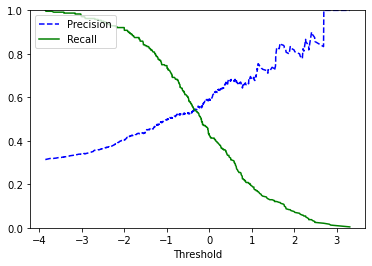

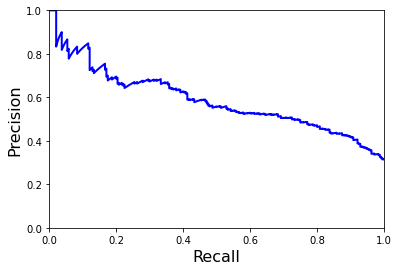

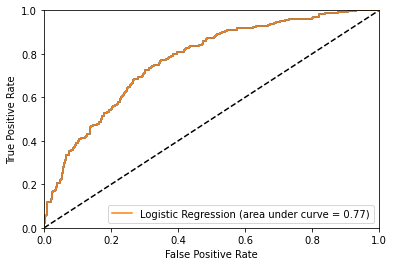

0.7720535714285713

In [353]:
#Run a 3-fold cross validation on the dataset
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model_lr, X_train, y_train, cv=3)
# And inspect the confusion matrix of the results
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)
#Calculate the precision and recall values
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)
recall_score(y_train, y_train_pred)
#Calculate f1 score
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)
# Find out the value of the decision score for dataset
y_scores = cross_val_predict(model_lr, X_train, y_train, cv=3,method="decision_function")
y_scores
# y_scores = np.delete(y_scores,0,1)
y_scores
y_scores.shape
#Plot the precision recall curve 
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()
#Plot precision against recall
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.show()
#Plot the ROC curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area under curve = %0.2f)' % logit_roc_auc)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
#And calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)


<AxesSubplot:>

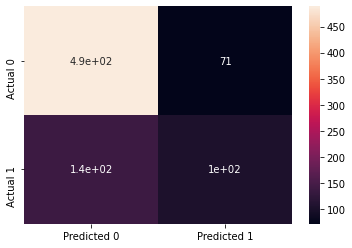

In [365]:


#Visualisation of Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_train,y_train_pred)
ylabel= ['Actual 0', 'Actual 1']
xlabel = ['Predicted 0', 'Predicted 1']
sns.heatmap(conf_matrix, annot=True, xticklabels=xlabel, yticklabels=ylabel,)

